# Visualise Plane Equations

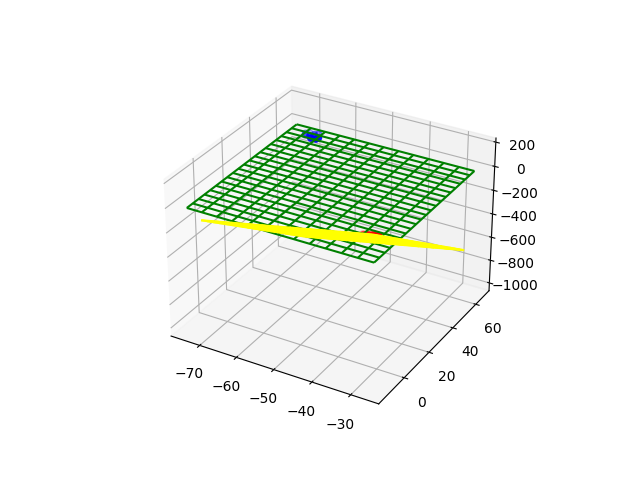

In [3]:
%matplotlib widget 

import matplotlib.pyplot as plt
from align_bases import * 
import gemmi 

structure = gemmi.read_structure("data/pdb1ais.ent")
residue = structure[0][0][0]

plane, position_list = get_base_plane(residue=residue)
A,B,C,D = plane
rot_mat = get_rotation_matrix(plane)

transformed_positions = [np.array(rot_mat.dot(x))[0] for x in position_list]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*zip(*position_list), c='red')
ax.scatter(*zip(*transformed_positions), c='blue')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1],4),
                np.arange(ylim[0], ylim[1],4 ))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = (D - X[r,c]*A - Y[r,c]*B)/C
ax.plot_wireframe(X,Y,Z, color='yellow')

tx = transformed_positions[:3]
    
BA = tx[1] - tx[0]
CA = tx[2] - tx[0]

cross = np.cross(BA, CA)
d = tx[0][0]*cross[0] + tx[0][1]*cross[1] + tx[0][2]*cross[2]

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1], 4),
                np.arange(ylim[0], ylim[1], 4))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = (d - X[r,c]*cross[0] - Y[r,c]*cross[1])/cross[2]
ax.plot_wireframe(X,Y,Z, color='green')

plt.show()
